In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from lxml import etree
#引入库

In [2]:
headers = {'Cookie':
'cna=rMq0GQuh1zkCAX1PgW5q2Wzg; __ysuid=1718358370251spK; __aysid=1718358370253YJu; isI18n=false; xlly_s=1; csrfToken=vD1I8MRI_ePtisgWHQON2V9r; __ayft=1718447331001; __arpvid=1718447331001rDSxTZ-1718447331011; __ayscnt=1; __aypstp=1; __ayspstp=2; mtop_partitioned_detect=1; _m_h5_tk=0ac0bf5c006dbe20238365f048cea54b_1718450932140; _m_h5_tk_enc=746ffb80426b9c9a1b08faf061df858e; isg=BJ2drDMvp1E5xUN83nSJpyD8rHmXutEMaddI_F9mNfRDFrhIJwjp3DPAQAoQ1unE; tfstk=f-sjp2fY4jcXxS6WsEeyAjtTzvxs5sZFMA9OKOnqBnKx6fBpaxR23soOP1CkuIFcbh_1N6twMmyD5G1RLt72D1r669xvSZRwgCt1I6wzTkrFntxMDWPUYVgw5hxEkdKt_YH-pQ5_ckrFntH2HJW8YRj6WZdp6hLvWQhJZd9t6FC9yUpMwmptDdh8FdAJ6hLvMUdJQpm96dpxiSVWErOAh8g0gem7ZPdWNcnIKKTxkOgZYDuvFEdpyKo9Ug9XlBBAm7eWZLIPVe8rQSxRKa5vFHZjtK_Rdnp1jJ361FsDVQ1QvcvlkssJ5gygoTs6GeIvPxwD239O6F_uODJX0aTCcZ2iwtCeGwKcQvNVFe_W-LL-CqKV89SMJiEjtQ8HC_TFlWif9gWIYB6aRVgMMc9WT8wSSVP2YGpqDdrl7EpkUMy7FjgMkLvWT8wSSVYvEL8zF8GjS',
'Priority':
'u=1, i',
'Referer':
'https://www.youku.com/channel/webmovie/list?filter=type_%E7%94%B5%E5%BD%B1_tags_%E5%8A%A8%E4%BD%9C_year_2023_sort_3&spm=a2hja.14919748_WEBMOVIE_JINGXUAN.drawer3.d_tags_3',
'Sec-Ch-Ua':
'"Microsoft Edge";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
'Sec-Ch-Ua-Mobile':
'?0',
'Sec-Ch-Ua-Platform':
'"Windows"',
'Sec-Fetch-Dest':
'empty',
'Sec-Fetch-Mode':
'cors',
'Sec-Fetch-Site':
'same-origin',
'User-Agent':
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36 Edg/125.0.0.0',
'X-Requested-With':
'XMLHttpRequest'
}
#获取请求头信息

In [3]:
url='https://www.youku.com/category/data?params=%7B%22type%22%3A%22%E7%94%B5%E5%BD%B1%22%2C%22tags%22%3A%22%E5%8A%A8%E4%BD%9C%22%2C%22year%22%3A%222020%22%2C%22sort%22%3A%223%22%7D&optionRefresh=1&pageNo=1'
#url信息

In [4]:
response = requests.get(url,headers=headers)
print(response.json())
s1=response.json()
#获取网页json代码

{'success': True, 'message': '', 'data': {'filterData': {'channelPage': '//movie.youku.com/', 'url': '/category/data', 'cateKey': '电影', 'param': {'type': '电影', 'tags': '动作', 'year': '2020', 'sort': '3'}, 'filter': {'filterData': [{'type': 14058, 'level': 3, 'subFilter': [{'title': '电视剧', 'filterType': 'type', 'value': '电视剧', 'action': {'type': 'NON', 'value': 'NON', 'contentType': None, 'contentValue': None, 'reportDisabled': False, 'extra': None, 'callback': None, 'reportConfig': None, 'report': {'pageName': 'page_channelmain_SHAIXUAN_ALL', 'arg1': None, 'spmAB': 'a2h05.8165803_SHAIXUAN_ALL', 'spmC': 'filter1', 'spmD': '1', 'scmAB': '20140719.search', 'scmC': '34439', 'scmD': 'type_电视剧', 'index': 1, 'reportDataOpt': None, 'trackInfo': {'component_id': 'WEB_FILTER_Category', 'component_instance_id': 227938, 'servertime': 1719450019796, 'object_title': '筛选项', 'drawerid': '34439', 'cms_req_id': '21311dca17194500197864036eddce'}, 'utParam': None}}}, {'title': '电影', 'filterType': 'type', '

In [5]:
data_list  = s1['data']['filterData']['listData']

In [6]:
import pandas as pd

# 假设您已经从 data_list 中提取了 songTimeMinutes、artist 和 name 数据
data = []

for i in data_list:
    title = i['title']
    subTitle = i['subTitle']
    summary = i['summary']
    videoLink = i['videoLink']
    img = i['img']
    data.append([title, subTitle, summary,videoLink,img])

# 创建 DataFrame
df = pd.DataFrame(data, columns=['title', 'subTitle', 'summary','videoLink','img'])

# 打印 DataFrame
print(df.head(10))

          title    subTitle summary  \
0           绅士们    欧洲权贵金钱交易     9.1   
1         拆弹专家2    刘德华陷爆炸迷局     8.7   
2            信条    诺兰烧脑时空逆战     8.7   
3    数码宝贝：最后的进化    数码少年终结冒险     8.7   
4          世界新闻  老船长和小女孩的旅行     8.5   
5  黑暗正义联盟：天启星战争    正义联盟最终决战     8.4   
6           金刚川     还原金刚川战役     8.3   
7          紧急救援    海上救援深入绝境     8.2   
8     豹子头林冲之山神庙    林冲陆谦雪夜对决     8.2   
9            野王    山林野人勇救女孩     8.2   

                                           videoLink  \
0  //v.youku.com/v_nextstage/id_cdeec513c0a240139...   
1  //v.youku.com/v_nextstage/id_afeb69f31f59487ea...   
2  //v.youku.com/v_nextstage/id_eeeabb40dab74160a...   
3  //v.youku.com/v_nextstage/id_cbbfc66b615f49bea...   
4  //v.youku.com/v_nextstage/id_d170e67b25c246e09...   
5  //v.youku.com/v_nextstage/id_baffc814093d43baa...   
6  //v.youku.com/v_nextstage/id_cdbf8fed71744bbca...   
7  //v.youku.com/v_nextstage/id_578f936ff7494cb19...   
8  //v.youku.com/v_nextstage/id_52efbfbdefbfbd5fe...   
9  //v.you

In [7]:
import pandas as pd
import requests
import os

# 假设您已经从 data_list 中提取了 songTimeMinutes、artist 和 name 数据
data = []

for i in data_list:
    title = i['title']
    subTitle = i['subTitle']
    summary = i['summary']
    videoLink = i['videoLink']
    img = i['img']
    data.append([title, subTitle, summary, videoLink, img])

# 创建 DataFrame
df = pd.DataFrame(data, columns=['title', 'subTitle', 'summary', 'videoLink', 'img'])

# 创建一个文件夹来保存下载的图片
if not os.path.exists('downloaded_images'):
    os.makedirs('downloaded_images')

# 下载图片并以序号+名称+评分命名
for idx, row in df.head(10).iterrows():
    img_url = row['img']
    img_name = f"{idx+1}_{row['title']}_{row['summary']}.jpg"
    img_path = os.path.join('downloaded_images', img_name)
    
    # 发起对图片的 GET 请求，并保存到本地
    response = requests.get(img_url)
    with open(img_path, 'wb') as f:
        f.write(response.content)
        print(f"Image {img_name} downloaded successfully.")

Image 1_绅士们_9.1.jpg downloaded successfully.
Image 2_拆弹专家2_8.7.jpg downloaded successfully.
Image 3_信条_8.7.jpg downloaded successfully.
Image 4_数码宝贝：最后的进化_8.7.jpg downloaded successfully.
Image 5_世界新闻_8.5.jpg downloaded successfully.
Image 6_黑暗正义联盟：天启星战争_8.4.jpg downloaded successfully.
Image 7_金刚川_8.3.jpg downloaded successfully.
Image 8_紧急救援_8.2.jpg downloaded successfully.
Image 9_豹子头林冲之山神庙_8.2.jpg downloaded successfully.
Image 10_野王_8.2.jpg downloaded successfully.


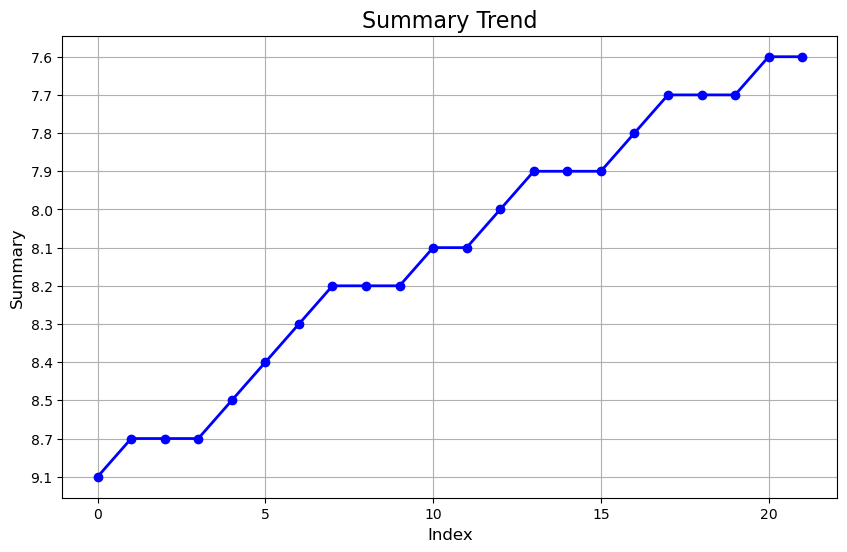

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 利用前文中创建的 DataFrame df
# 假设 DataFrame df 中有一个名为 'summary' 的列存储了摘要信息

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['summary'], marker='o', color='b', linestyle='-', linewidth=2)

# 添加图表标题和轴标签
plt.title('Summary Trend', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Summary', fontsize=12)

# 显示网格线
plt.grid(True)

# 显示图表
plt.show()